## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0722 11:36:56.576803  3916 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0722 11:36:56.578799  3916 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0722 11:36:56.622680  3916 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 11:36:56.623677  3916 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 11:36:56.626667  3916 depr

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.8465 - acc: 0.3415 - val_loss: 1.7803 - val_acc: 0.3630
Epoch 2/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.6373 - acc: 0.4211 - val_loss: 1.6323 - val_acc: 0.4051
Epoch 3/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5491 - acc: 0.4508 - val_loss: 1.6243 - val_acc: 0.4180
Epoch 4/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.4888 - acc: 0.4725 - val_loss: 1.5149 - val_acc: 0.4645
Epoch 5/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4369 - acc: 0.4891 - val_loss: 1.4501 - val_acc: 0.4816
Epoch 6/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.3890 - acc: 0.5100 - val_loss: 1.4495 - val_acc: 0.4748
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3522 - acc: 0.5229 - val_loss: 1.5238 - 

50000/50000 [==============================] - 7s 135us/step - loss: 2.1306 - acc: 0.2303 - val_loss: 1.9862 - val_acc: 0.2898
Epoch 2/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.9179 - acc: 0.3250 - val_loss: 1.8665 - val_acc: 0.3421
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.8280 - acc: 0.3606 - val_loss: 1.7975 - val_acc: 0.3704
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7697 - acc: 0.3799 - val_loss: 1.7545 - val_acc: 0.3845
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.7291 - acc: 0.3936 - val_loss: 1.7176 - val_acc: 0.3977
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6933 - acc: 0.4086 - val_loss: 1.6873 - val_acc: 0.4134
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.6638 - acc: 0.4192 - val_loss: 1.6604 - val_acc: 0.4191
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 137us/step - loss: 2.1556 - acc: 0.2221 - val_loss: 2.1235 - val_acc: 0.2375
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1001 - acc: 0.2529 - val_loss: 2.0764 - val_acc: 0.2609
Epoch 4/50
50000/50000 [==============================] - 1222s 24ms/step - loss: 2.0584 - acc: 0.2710 - val_loss: 2.0399 - val_acc: 0.2778
Epoch 5/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.0249 - acc: 0.2857 - val_loss: 2.0103 - val_acc: 0.2896
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9972 - acc: 0.2975 - val_loss: 1.9851 - val_acc: 0.3005
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.9733 - acc: 0.3055 - val_loss: 1.9634 - val_acc: 0.3087
Epoch 8/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.9525 - acc: 0.3143 - val_loss: 1.9435 - val_acc: 0.3154
Epoch 9/50
50000/50000 [===================

50000/50000 [==============================] - 7s 133us/step - loss: 2.2931 - acc: 0.1411 - val_loss: 2.2862 - val_acc: 0.1425
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2789 - acc: 0.1503 - val_loss: 2.2735 - val_acc: 0.1553
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2671 - acc: 0.1595 - val_loss: 2.2623 - val_acc: 0.1660
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2564 - acc: 0.1689 - val_loss: 2.2520 - val_acc: 0.1757
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2463 - acc: 0.1780 - val_loss: 2.2422 - val_acc: 0.1869
Epoch 8/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.2366 - acc: 0.1890 - val_loss: 2.2328 - val_acc: 0.1979
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2272 - acc: 0.1994 - val_loss: 2.2236 - val_acc: 0.2045
Epoch 10/50
50000/50000 [====================

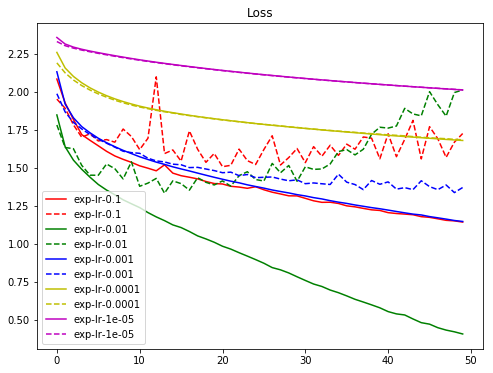

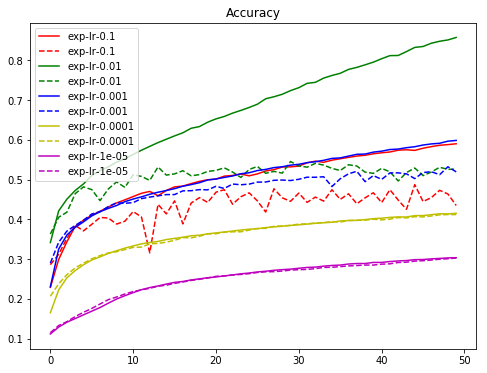

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()